# Likes and Retweets

In this notebook:
* Log transform favorite count
* Create histograms for likes and retweets
* Create histogram for log transformed likes for Clinton
* Boxplot for likes and retweets
* Likes and retweets during the day
* Likes and retweets per week
* Scatterplot likes and retweets

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Open Tweets

In [2]:
path_clinton = '../Data/tweets_clinton_20151109_20161109_readability.json'

with open(path_clinton, encoding="utf8") as f:
    tweets_clinton = pd.read_json(f, orient='columns', convert_axes=True, dtype=True, lines=False)
    
tweets_clinton['created_at'] = tweets_clinton['created_at'].dt.tz_localize(tz='GMT', ambiguous='infer').dt.tz_convert(tz='US/Eastern')

In [3]:
path_trump = '../Data/tweets_trump_20151109_20161109_readability.json'

with open(path_trump, encoding="utf8") as f:
    tweets_trump = pd.read_json(f, orient='columns', convert_axes=True, dtype=True, lines=False)
    
tweets_trump['created_at'] = tweets_trump['created_at'].dt.tz_localize(tz='GMT', ambiguous='infer').dt.tz_convert(tz='US/Eastern')

In [4]:
all_tweets = pd.concat([tweets_clinton, tweets_trump], sort=False)

In [5]:
# Seaborn style
sns.set_style("whitegrid")
sns.set_context("talk")

# Colors
my_pal = {"Clinton": "royalblue", "Trump": "orangered"}

In [6]:
# Make copy of dataframe with log transformed favorites
all_tweets_log = all_tweets.copy()
all_tweets_log['favorite_count'] = all_tweets_log.apply(lambda x: np.log(x.favorite_count + 1), axis = 1)

# Column specifying which rows are log transformed
all_tweets_log['log'] = True
all_tweets['log'] = False

# Concatenate 'normal' dataframe and log dataframe
all_tweets_log = pd.concat([all_tweets, all_tweets_log])

In [7]:
print(all_tweets_log[(all_tweets_log['user'] == 'Clinton') & (all_tweets_log['log'] == True)]['favorite_count'].skew())
print(all_tweets_log[(all_tweets_log['user'] == 'Clinton') & (all_tweets_log['log'] == False)]['favorite_count'].skew())

-1.974405562927214
33.79560385558708


## Histograms

### Clinton

c:\users\leony\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


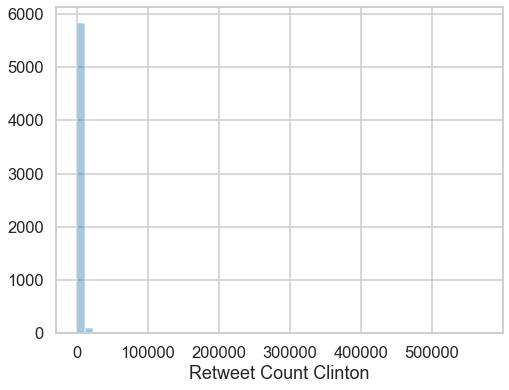

In [8]:
# Size
plt.figure(figsize=(8, 6))

a = sns.distplot(tweets_clinton['retweet_count'], kde = False, axlabel = 'Retweet Count Clinton')

In [9]:
tweets_clinton[tweets_clinton['retweet_count'] == tweets_clinton['retweet_count'].max()]

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str,user,text_clean,readability grades Kincaid,...,word usage pronoun,word usage preposition,word usage nominalization,sentence beginnings pronoun,sentence beginnings interrogative,sentence beginnings article,sentence beginnings subordination,sentence beginnings conjunction,sentence beginnings preposition,hashtags
2344,TweetDeck,Delete your account. https://t.co/Oa92sncRQY,2016-06-09 14:27:53-04:00,571016,726837,False,740973710593654784,Clinton,Delete your account . RQY,0.72,...,1,0,0,0,0,0,0,0,0,[]


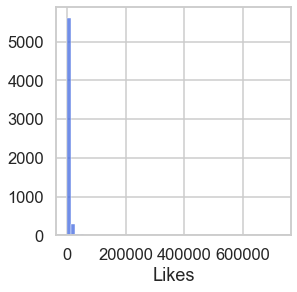

In [10]:
plt.figure(figsize=(4.2, 4.2))

b = sns.histplot(
    all_tweets_log[(all_tweets_log['user'] == 'Clinton') & (all_tweets_log['log'] == False)]['favorite_count'],
    bins = 50,
    kde = False,
    color = 'royalblue'
)

plt.xlabel('Likes')
plt.ylabel('')

plt.savefig('../Plots/distplt_like_before_log_clinton.pdf', format = 'pdf', bbox_inches = 'tight')

In [11]:
tweets_clinton[tweets_clinton['favorite_count'] == tweets_clinton['favorite_count'].max()]

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str,user,text_clean,readability grades Kincaid,...,word usage pronoun,word usage preposition,word usage nominalization,sentence beginnings pronoun,sentence beginnings interrogative,sentence beginnings article,sentence beginnings subordination,sentence beginnings conjunction,sentence beginnings preposition,hashtags
2344,TweetDeck,Delete your account. https://t.co/Oa92sncRQY,2016-06-09 14:27:53-04:00,571016,726837,False,740973710593654784,Clinton,Delete your account . RQY,0.72,...,1,0,0,0,0,0,0,0,0,[]


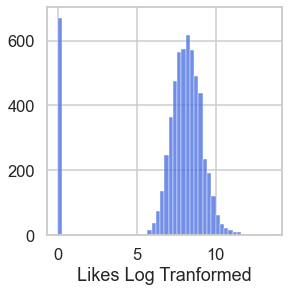

In [12]:
plt.figure(figsize=(4.2, 4.2))

m = sns.histplot(
    all_tweets_log[(all_tweets_log['user'] == 'Clinton') & (all_tweets_log['log'] == True)]['favorite_count'],
    bins = 50,
    kde = False,
    color = 'royalblue'
)

plt.xlabel('Likes Log Tranformed')
plt.ylabel('')

plt.savefig('../Plots/distplt_like_after_log_clinton.pdf', format = 'pdf', bbox_inches = "tight")

### Trump

c:\users\leony\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


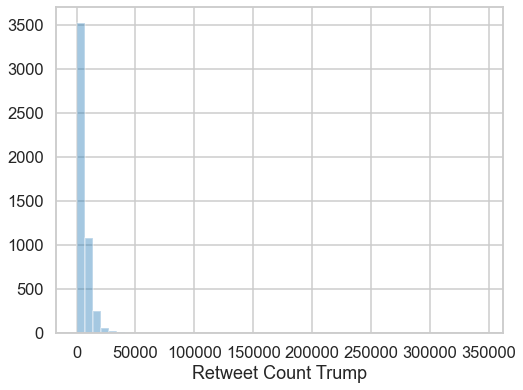

In [13]:
# Size
plt.figure(figsize=(8, 6))

c = sns.distplot(tweets_trump['retweet_count'], kde = False, axlabel = 'Retweet Count Trump')

In [14]:
tweets_trump[tweets_trump['retweet_count'] == tweets_trump['retweet_count'].max()]

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str,user,text_clean,readability grades Kincaid,...,word usage pronoun,word usage preposition,word usage nominalization,sentence beginnings pronoun,sentence beginnings interrogative,sentence beginnings article,sentence beginnings subordination,sentence beginnings conjunction,sentence beginnings preposition,hashtags
6,Android,TODAY WE MAKE AMERICA GREAT AGAIN!,2016-11-08 06:43:14-05:00,344806,573283,False,795954831718498304,Trump,TODAY WE MAKE AMERICA GREAT AGAIN !,-13.25,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[]


c:\users\leony\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


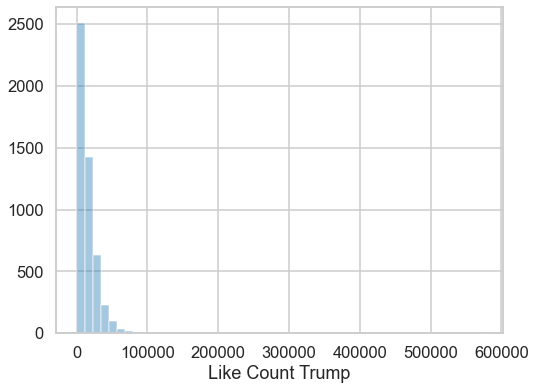

In [15]:
plt.figure(figsize=(8, 6))

d = sns.distplot(tweets_trump['favorite_count'], kde = False, axlabel = 'Like Count Trump')

In [16]:
tweets_trump[tweets_trump['favorite_count'] == tweets_trump['favorite_count'].max()]

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str,user,text_clean,readability grades Kincaid,...,word usage pronoun,word usage preposition,word usage nominalization,sentence beginnings pronoun,sentence beginnings interrogative,sentence beginnings article,sentence beginnings subordination,sentence beginnings conjunction,sentence beginnings preposition,hashtags
6,Android,TODAY WE MAKE AMERICA GREAT AGAIN!,2016-11-08 06:43:14-05:00,344806,573283,False,795954831718498304,Trump,TODAY WE MAKE AMERICA GREAT AGAIN !,-13.25,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[]


## Boxplot

In [17]:
meanlineprops = dict(linestyle='--', linewidth=2.5, color='white')

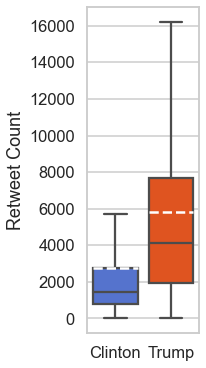

In [18]:
plt.figure(figsize=(2, 6))

e = sns.boxplot(
    x = 'user',
    y = 'retweet_count',
    data = all_tweets,
    palette = my_pal,
    showfliers = False,
    showmeans = True,
    meanline = True,
    meanprops = meanlineprops
).set(
    xlabel='', 
    ylabel='Retweet Count'
)

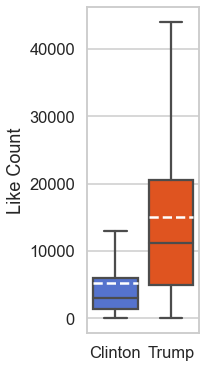

In [19]:
plt.figure(figsize=(2, 6))

f = sns.boxplot(
    x = 'user',
    y = 'favorite_count',
    data = all_tweets,
    palette = my_pal,
    showfliers = False,
    showmeans = True,
    meanline = True,
    meanprops = meanlineprops
).set(
    xlabel='', 
    ylabel='Like Count'
)

## Over Time (Line)

### During the Day

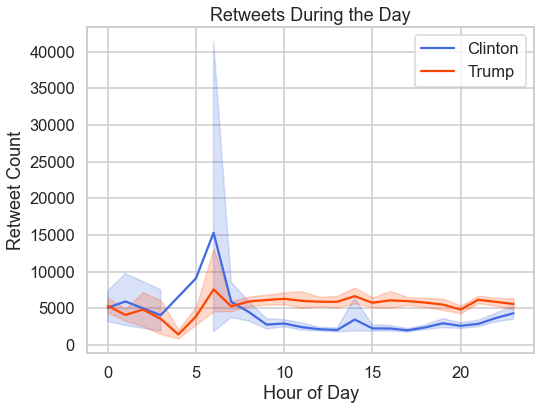

In [20]:
plt.figure(figsize=(8, 6))

g = sns.lineplot(
    x = all_tweets['created_at'].dt.hour,
    y = all_tweets['retweet_count'],
    hue = all_tweets['user'],
    palette = my_pal
).set(
    xlabel = 'Hour of Day', 
    ylabel = 'Retweet Count',
    title = 'Retweets During the Day'
)

plt.legend(title='')

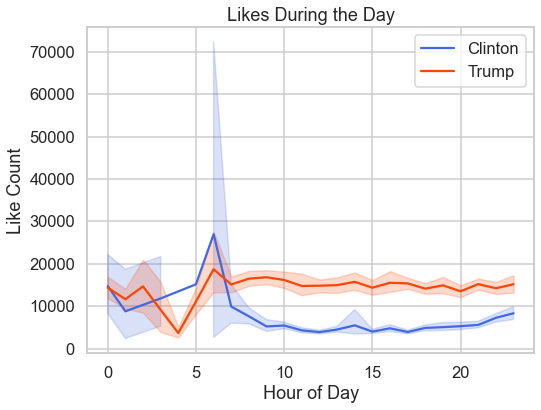

In [21]:
plt.figure(figsize=(8, 6))

h = sns.lineplot(
    x = all_tweets['created_at'].dt.hour,
    y = all_tweets['favorite_count'],
    hue = all_tweets['user'],
    palette = my_pal
).set(
    xlabel = 'Hour of Day', 
    ylabel = 'Like Count',
    title = 'Likes During the Day'
)

plt.legend(title='')

### Per Week

In [22]:
tweets_trump_per_week = tweets_trump.resample('W', on='created_at').mean()
tweets_trump_per_week['user'] = 'Trump'

tweets_clinton_per_week = tweets_clinton.resample('W', on='created_at').mean()
tweets_clinton_per_week['user'] = 'Clinton'

all_tweets_per_week = pd.concat([tweets_trump_per_week, tweets_clinton_per_week], sort=False)

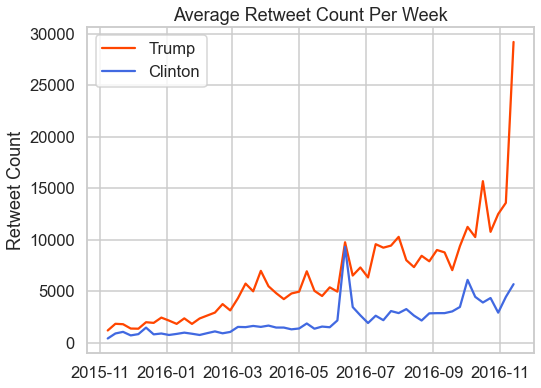

In [23]:
# Size
plt.figure(figsize=(8, 6))

# Plot
i = sns.lineplot(
    x = all_tweets_per_week.index.values,
    y = all_tweets_per_week['retweet_count'],
    hue = all_tweets_per_week['user'],
    palette = my_pal,
    ci = None
).set(
    xlabel = '', 
    ylabel = 'Retweet Count',
    title = 'Average Retweet Count Per Week'
)

plt.legend(title='')

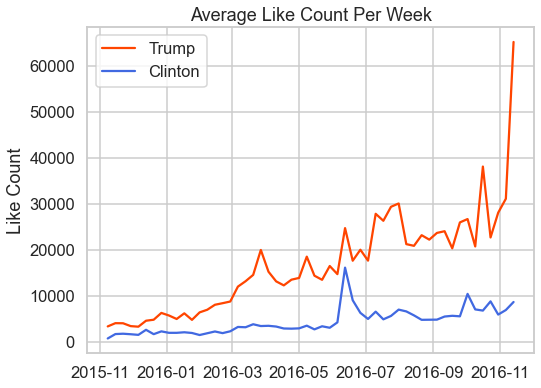

In [24]:
# Size
plt.figure(figsize=(8, 6))

# Plot
j = sns.lineplot(
    x = all_tweets_per_week.index.values,
    y = all_tweets_per_week['favorite_count'],
    hue = all_tweets_per_week['user'],
    palette = my_pal,
    ci = None
).set(
    xlabel = '', 
    ylabel = 'Like Count',
    title = 'Average Like Count Per Week'
)

plt.legend(title='')

## Correlation between favorites and retweets

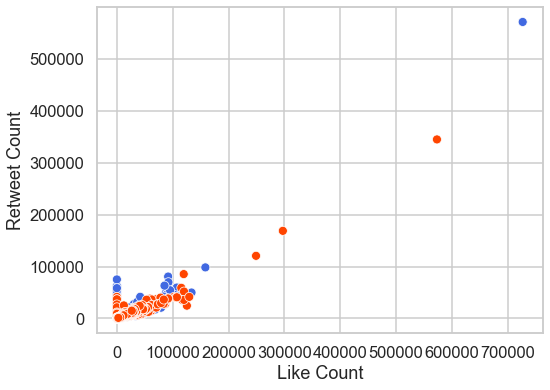

In [25]:
# Size
plt.figure(figsize=(8, 6))

# Plot
k = sns.scatterplot(
    x = 'favorite_count',
    y = 'retweet_count',
    hue = 'user',
    data = all_tweets,
    palette = my_pal,
    legend = False
).set(
    xlabel = 'Like Count', 
    ylabel = 'Retweet Count',
    title = ''
)

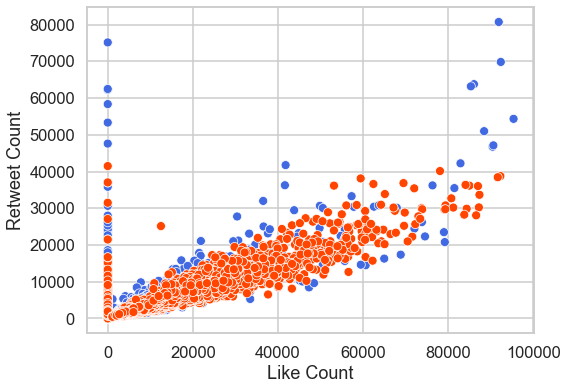

In [26]:
# Size
plt.figure(figsize=(8, 6))

# Plot
l = sns.scatterplot(
    x = 'favorite_count',
    y = 'retweet_count',
    hue = 'user',
    data = all_tweets[all_tweets['favorite_count'] < 100000],
    palette = my_pal,
    legend = False
).set(
    xlabel = 'Like Count', 
    ylabel = 'Retweet Count',
    title = ''
)

In [27]:
all_tweets['favorite_count'].corr(all_tweets['retweet_count'], method='spearman')

0.8248592094399887

In [28]:
all_tweets['favorite_count'].corr(all_tweets['retweet_count'])

0.8958426676882377